
---------

-0.17366887199423836


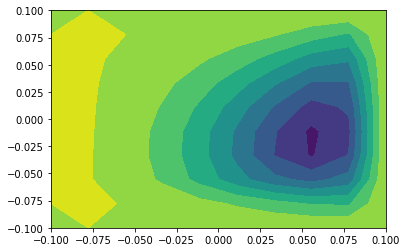

In [8]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn-white')
n=10; L=1; U=1; h = L/(n-1);re = 100;t=0.001; #dt=(re * h**2)/4 ;#
dt = 1e-3; #dt2 = 4/(re * U**2); #dt = min(dt1,dt2)
tm=0.5; maxe = 1e-8; mu=0.01; rho = 1;
#print(L)
si= np.zeros((n,n))
u= np.zeros((n,n))
v= np.zeros((n,n))
om= np.zeros((n,n))
omt= np.zeros((n,n))
#si[0][j] = 2
#print(si)


        #if j==n-1:
         #   om[i][j] = -2 * U/h
#print(om)
#i=1;j=1

#print(i,j)
k=0
while k<3600:
    #omt1 = omt
    for i in range(n):
    #print(i)
        for j in range(n):
            if j>0  and j<n-1:
                omt[0][j] = -2 * si[2][j] / h**2
                omt[n-1][j] = -2 * si[n-2][j] / h**2
            if i>0 and i<n-1:
                omt[i][0] = -2 * si[i][2] / h**2
                omt[i][n-1]=-2 * (si[i][n-2] + U*h) /h**2
        
    
    #print('loop is running')
    t+=dt
    k+=1
    #print('\n',om)
    #print('\n \n', omt)
    #print('\n----------------\n')
    om = omt.copy()
    sit = si.copy()
    for i in range(n-1):
        for j in range(n-1):
            
            if i >0 & i< n-1:
                if j>0 & j<n-1:
                    if u[i][j]>=0 and v[i][j]>=0:
                        omt[i][j] = om[i][j] + (-1*(((si[i][j+1]-si[i][j-1])/(2*h)) * ((om[i][j]-om[i-1][j])/(h))+\
                        ((si[i+1][j]-si[i-1][j])/(2*h)) * ((om[i][j]-om[i][j-1])/(h)))+\
                        (mu/rho)*((om[i+1][j]+om[i-1][j] - 4*om[i][j]+om[i][j+1]+om[i][j-1])/(h**2)))*dt
                    elif u[i][j] < 0 and v[i][j]>=0:
                        omt[i][j] = om[i][j] + (-1*(((si[i][j+1]-si[i][j-1])/(2*h)) * ((om[i+1][j]-om[i][j])/(h))+\
                        ((si[i+1][j]-si[i-1][j])/(2*h)) * ((om[i][j]-om[i][j-1])/(h)))+\
                        (mu/rho)*((om[i+1][j]+om[i-1][j] - 4*om[i][j]+om[i][j+1]+om[i][j-1])/(h**2)))*dt
                    elif u[i][j] >=0 and v[i][j]<0:
                        omt[i][j] = om[i][j] + (-1*(((si[i][j+1]-si[i][j-1])/(2*h)) * ((om[i][j]-om[i-1][j])/(h))+\
                        ((si[i+1][j]-si[i-1][j])/(2*h)) * ((om[i][j+1]-om[i][j])/(h)))+\
                        (mu/rho)*((om[i+1][j]+om[i-1][j] - 4*om[i][j]+om[i][j+1]+om[i][j-1])/(h**2)))*dt
                    elif u[i][j] < 0 and v[i][j]<0:
                        omt[i][j] = om[i][j] + (-1*(((si[i][j+1]-si[i][j-1])/(2*h)) * ((om[i+1][j]-om[i][j])/(h))+\
                        ((si[i+1][j]-si[i-1][j])/(2*h)) * ((om[i][j+1]-om[i][j])/(h)))+\
                        (mu/rho)*((om[i+1][j]+om[i-1][j] - 4*om[i][j]+om[i][j+1]+om[i][j-1])/(h**2)))*dt
            if i>0 & i<n-1:
                if j>0 & j<n-1:
                    #print(i)
                    si[i][j] = (si[i+1][j] + si[i-1][j] + si[i][j+1]+si[i][j-1] + omt[i][j] * h**2 )/4
                    #print((omt-om))
        #err = omt - om
        #print(err)
    #Convergence criteria
    #err = abs(omt - om)
    #print(err)
    #e = err.max()
    #print('\n',e)
    #print('-------')

    if k>10:
        err2=0
        err=0
        err+= (abs(omt-om))**2
        err2+= (abs(sit-si))**2
        #o = abs(err.max())
        #u = abs(err.min())
        #e = err.max()
        e = np.sqrt(err2)
        e1 = np.sqrt(err)
        e3 = e1.max()
        e2 = e.max()
        #e = err.max()
        #print(err2)
        #print('\n',e2)
        #print('\n-----\n')
        if e3 < maxe:
            print('omega converged', e3)
            if e2 < maxe:
                print('si converged', e2)
                break
    #om = omt
    #print(omt)
    #print(si)
    #break
for i in range(n-1):
    for j in range(n-1):
        if i>0 & i<n-1:
            if j>0 & j<n-1:
                u[i][j]=(sit[i][j+1]-sit[i][j-1])/(2*h)
                v[i][j]=(sit[i-1][j]-sit[i+1][j])/(2*h)
        if j>0 & j<n-1:
            u[n-1][j] = U
                      
            

        
#print('\n \n omt1 is\n', om)
#x = omt-om
#print(x)
#print('\n \n si is\n', si)

print('\n---------\n')          
#print(u)
#plt.imshow(sit)
x = np.linspace(-0.1,0.1,n)
y = np.linspace(-0.1,0.1,n)

X, Y = np.meshgrid(x, y)
Z = sit
print(v.min())
#---------------
#u1 = u/U
#g = u1.shape
#print(g)
#s = u1[g[1]-1]
#print(s)
#plt.plot(Y,u1)
#_--------------
fig, ax = plt.subplots(1,1)
ax.contourf(X,Y,Z)
plt.show()
#-------------
#plt.contour(X, Y, Z, cmap='RdGy')
#plt.colorbar()
#plt.contour(X, Y, u, cmap='RdGy')
#plt.contour(X, Y, v, colors='red')

